### Linear Regression - Tensforflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [6]:
# tf graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# weights
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

In [11]:
# linear model
pred = tf.add(tf.multiply(X,W), b)

In [15]:
# mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

# gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
# initialize the variables
init = tf.global_variables_initializer()

Epoch: 50, cost= 0.081633478, W= 0.28787878155708313, b= 0.5260451436042786
Epoch: 100, cost= 0.081094436, W= 0.2856018543243408, b= 0.5424258708953857
Epoch: 150, cost= 0.080617785, W= 0.28346022963523865, b= 0.5578328371047974
Epoch: 200, cost= 0.080196343, W= 0.28144586086273193, b= 0.5723235607147217
Epoch: 250, cost= 0.079823717, W= 0.27955135703086853, b= 0.5859521627426147
Epoch: 300, cost= 0.079494230, W= 0.27776941657066345, b= 0.5987714529037476
Epoch: 350, cost= 0.079202883, W= 0.27609342336654663, b= 0.6108288168907166
Epoch: 400, cost= 0.078945383, W= 0.2745174765586853, b= 0.6221659779548645
Epoch: 450, cost= 0.078717746, W= 0.2730351984500885, b= 0.6328288912773132
Epoch: 500, cost= 0.078516498, W= 0.27164119482040405, b= 0.642857551574707
Epoch: 550, cost= 0.078338563, W= 0.27032986283302307, b= 0.652290940284729
Epoch: 600, cost= 0.078181274, W= 0.2690965533256531, b= 0.661163866519928
Epoch: 650, cost= 0.078042246, W= 0.26793667674064636, b= 0.669507622718811
Epoch: 7

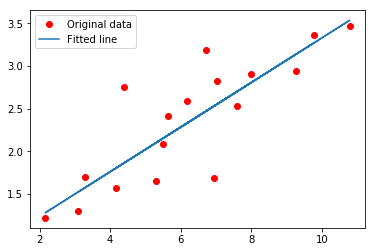

In [23]:
# start training
with tf.Session() as sess:
    sess.run(init)
    
    # fit all training data
    for epoch in range(1, training_epochs+1):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X:x, Y:y})
        # display logs per epoch step
        if (epoch) % display_step == 0:
            c = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
            print ('Epoch: {}, cost= {:.9f}, W= {}, b= {}'.format(epoch,
                                                                  c, 
                                                                  sess.run(W),
                                                                  sess.run(b)))
    print('Optimization Finished!')
    training_cost = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
    print('Training cost = {}, W = {}, b = {} \n'.format(training_cost,
                                                         sess.run(W),
                                                         sess.run(b)))
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W)*train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()